In [4]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
from random import sample
import shutil
from zipfile import ZipFile ## Download this library if not available
import warnings

warnings.filterwarnings("ignore") ##Ignore all sort of warnings

In [5]:
data = pd.read_csv("PCA_practice_dataset.csv",header=None)

In [6]:
data

,0,1,2,3,4,5,6,7,8,9,...,25,26,27,28,29,30,31,32,33,34
0,-0.031250,0.236364,0.238095,-0.090909,0.000000,0.381818,0.326316,-0.015625,-0.125000,0.553398,...,0.576923,0.471264,-0.033333,-0.046154,0.524752,0.410526,-0.015625,-0.187500,0.495146,0.515789
1,-0.031250,0.309091,0.380952,0.074380,0.129032,0.472727,0.557895,0.078125,-0.031250,0.398058,...,0.519231,0.425287,0.000000,0.138462,0.663366,0.368421,0.015625,0.125000,0.533981,0.368421
2,-0.031250,0.381818,0.261905,-0.107438,0.000000,0.527273,0.326316,0.046875,-0.031250,0.631068,...,0.384615,0.103448,-0.250000,-0.138462,0.425743,0.263158,-0.109375,-0.031250,0.650485,0.452632
3,-0.031250,0.381818,0.285714,-0.123967,-0.129032,0.309091,0.073684,-0.156250,0.093750,0.398058,...,0.519231,0.425287,-0.050000,-0.107692,0.485149,0.368421,-0.031250,-0.250000,0.203883,0.094737
4,-0.031250,0.381818,0.357143,-0.024793,-0.096774,0.454545,0.431579,-0.015625,-0.250000,0.398058,...,0.480769,0.471264,-0.033333,-0.169231,0.524752,0.515789,-0.015625,-0.281250,0.495146,0.410526
5,-0.031250,0.381818,0.357143,-0.024793,0.000000,0.381818,0.431579,-0.015625,-0.031250,0.553398,...,0.480769,0.471264,-0.033333,-0.046154,0.623762,0.515789,0.046875,0.062500,0.592233,0.410526
6,-0.031250,0.381818,0.357143,-0.090909,-0.096774,0.309091,0.221053,-0.078125,-0.375000,0.320388,...,0.653846,0.586207,0.100000,-0.046154,0.702970,0.515789,0.046875,-0.062500,0.592233,0.515789
7,-0.031250,0.381818,0.357143,0.041322,-0.129032,0.309091,0.326316,-0.093750,-0.281250,0.242718,...,0.038462,-0.149425,-0.250000,-0.600000,-0.009901,-0.157895,-0.281250,-0.625000,0.106796,0.157895
8,-0.031250,0.381818,0.380952,0.074380,0.129032,0.545455,0.452632,0.078125,0.093750,0.572816,...,0.442308,0.425287,0.000000,0.015385,0.564356,0.368421,0.015625,0.000000,0.533981,0.368421
9,-0.031250,0.381818,0.476190,-0.024793,0.000000,0.454545,0.431579,0.046875,-0.031250,0.553398,...,0.461538,0.310345,-0.066667,-0.384615,0.425743,0.263158,-0.046875,-0.406250,0.320388,0.263158


In [7]:
cov_data = np.cov(data)

In [8]:
cov_data.shape

(8042, 8042)

In [9]:
eig_val, eig_vec = np.linalg.eig(cov_data) ## Find the eigen vectors and the corresponding eigen values of the matrix


In [11]:
eig_val.shape

(8042,)

In [14]:
eig_vec_ls = []
for i in range(eig_vec.shape[1]):
    e=np.matrix(data).T@eig_vec[:,i]
    e=e/eig_val[i]
    eig_vec_ls.append(np.ravel(e))

In [16]:
sort_index = np.argsort(eig_val)
t_val = np.arange(0.9,0.98,0.01)
t_val = t_val.round(2)
sort_index = sort_index[::-1]
e_val_sum = np.sum(eig_val)
temp_sum=0
prin_e_val=[]
prin_e_vec=[]
t=0.9
i=0
prin_comp=[]
while t<0.98:
    while temp_sum<t*e_val_sum :
        prin_e_val.append(eig_val[sort_index[i]])
        prin_e_vec.append(eig_vec_ls[sort_index[i]])
        temp_sum += eig_val[sort_index[i]]
        i += 1
    prin_comp.append(i)
    t+=0.01

In [17]:
prin_comp

[4, 5, 5, 6, 6, 7, 7, 9]

In [18]:
for i in range(len(t_val)):
    print("Number of principal components at threshold {} is {}".format(t_val[i],prin_comp[i]))

Number of principal components at threshold 0.9 is 4
Number of principal components at threshold 0.91 is 5
Number of principal components at threshold 0.92 is 5
Number of principal components at threshold 0.93 is 6
Number of principal components at threshold 0.94 is 6
Number of principal components at threshold 0.95 is 7
Number of principal components at threshold 0.96 is 7
Number of principal components at threshold 0.97 is 9


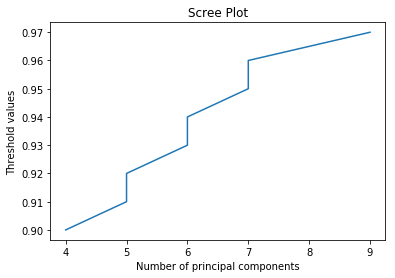

In [19]:
plt.plot(prin_comp,t_val)
plt.title("Scree Plot")
plt.xlabel("Number of principal components")
plt.ylabel("Threshold values")
plt.show()